In [1]:
import matplotlib.pyplot as plt                              
import seaborn as sns                                        
import pandas as pd                                          
from sklearn.model_selection import GridSearchCV             # For parameter optimization
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees
from sklearn.metrics import plot_confusion_matrix            # Evaluation measure
from sklearn.model_selection import train_test_split  # For train-test split
import warnings                                       #For supressing warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# Rename all attribute columns. The last column is renamed to 'y'
df.columns = ['X' + str(i) for i in range(0, len(df.columns) - 1)] + ['y']

# Shows the first few lines of the data
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Rename all attribute columns. The last column is renamed to 'y'
df.columns = ['X' + str(i) for i in range(0, len(df.columns) - 1)] + ['y']

# Shows the first few lines of the data
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# training data set
trn = X_trn
trn['y'] = y_trn

# Fetches the attributes X0 to X56 as X_trn
X_trn = trn.filter(regex='\d')

# Fetches the class variable as y_trn
y_trn = trn.y

# testing dataset
tst = X_tst
tst['y'] = y_tst

# Fetches the attributes X0 to X56 as X_tst
X_tst = tst.filter(regex='\d')

# Fetches the class variable as y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
1507,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1652,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2279,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
2106,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
3688,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


- Create a 'DecisionTreeClassifier' object and fit to the training data. 'DecisionTreeClassifier' requires two parameters:

1. 'criterion': `entropy` or `gini`
2. 'max_leaf_nodes': the size of the tree by explicitly stating the total leaf nodes

In [6]:
# Creates a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_leaf_nodes=7) 

# Fits the decision tree to training data
dt.fit(X_trn,y_trn)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7, random_state=0)

- Calculate mean accuracy on training data

In [7]:
print('Accuracy on training data: ' + str("{:.2%}".format(dt.score(X_trn, y_trn))))

Accuracy on training data: 89.84%


- Using 'GridSearchCV' object can be used to find the optimal decision tree. In the code below `GridSearchCV` is set up with the default 5 fold cross validation.

In [8]:
# Define a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    random_state=1) 

# Possible values for max_leaf_nodes to try
param = range(6,45,2)

# GridSearchCV object 
grid = GridSearchCV(dt, {'max_leaf_nodes': param, 'criterion': ['entropy','gini']})

# Fit the grid to the training data 
grid.fit(X_trn,y_trn)

# Store the optimum model in best_dt
best_dt = grid.best_estimator_

# Display the optimum model
best_dt.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

- Plot of accuracy against various values of 'max_leaf_nodes'. The 'gini' and 'entropy' measures are plotted separately.

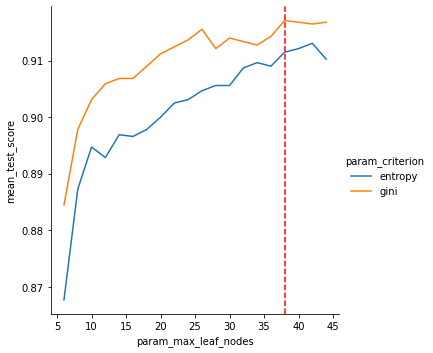

In [9]:
# Plots the mean accuracy against max_leaf_nodes
sns.relplot(
    data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
    kind='line',
    x='param_max_leaf_nodes', 
    y='mean_test_score', 
    hue='param_criterion'
)

# Draw a vertical red line along the best model
plt.axvline(
    x=best_dt.max_leaf_nodes, 
    color='red', 
    ls='--')

- Display the Decision Tree

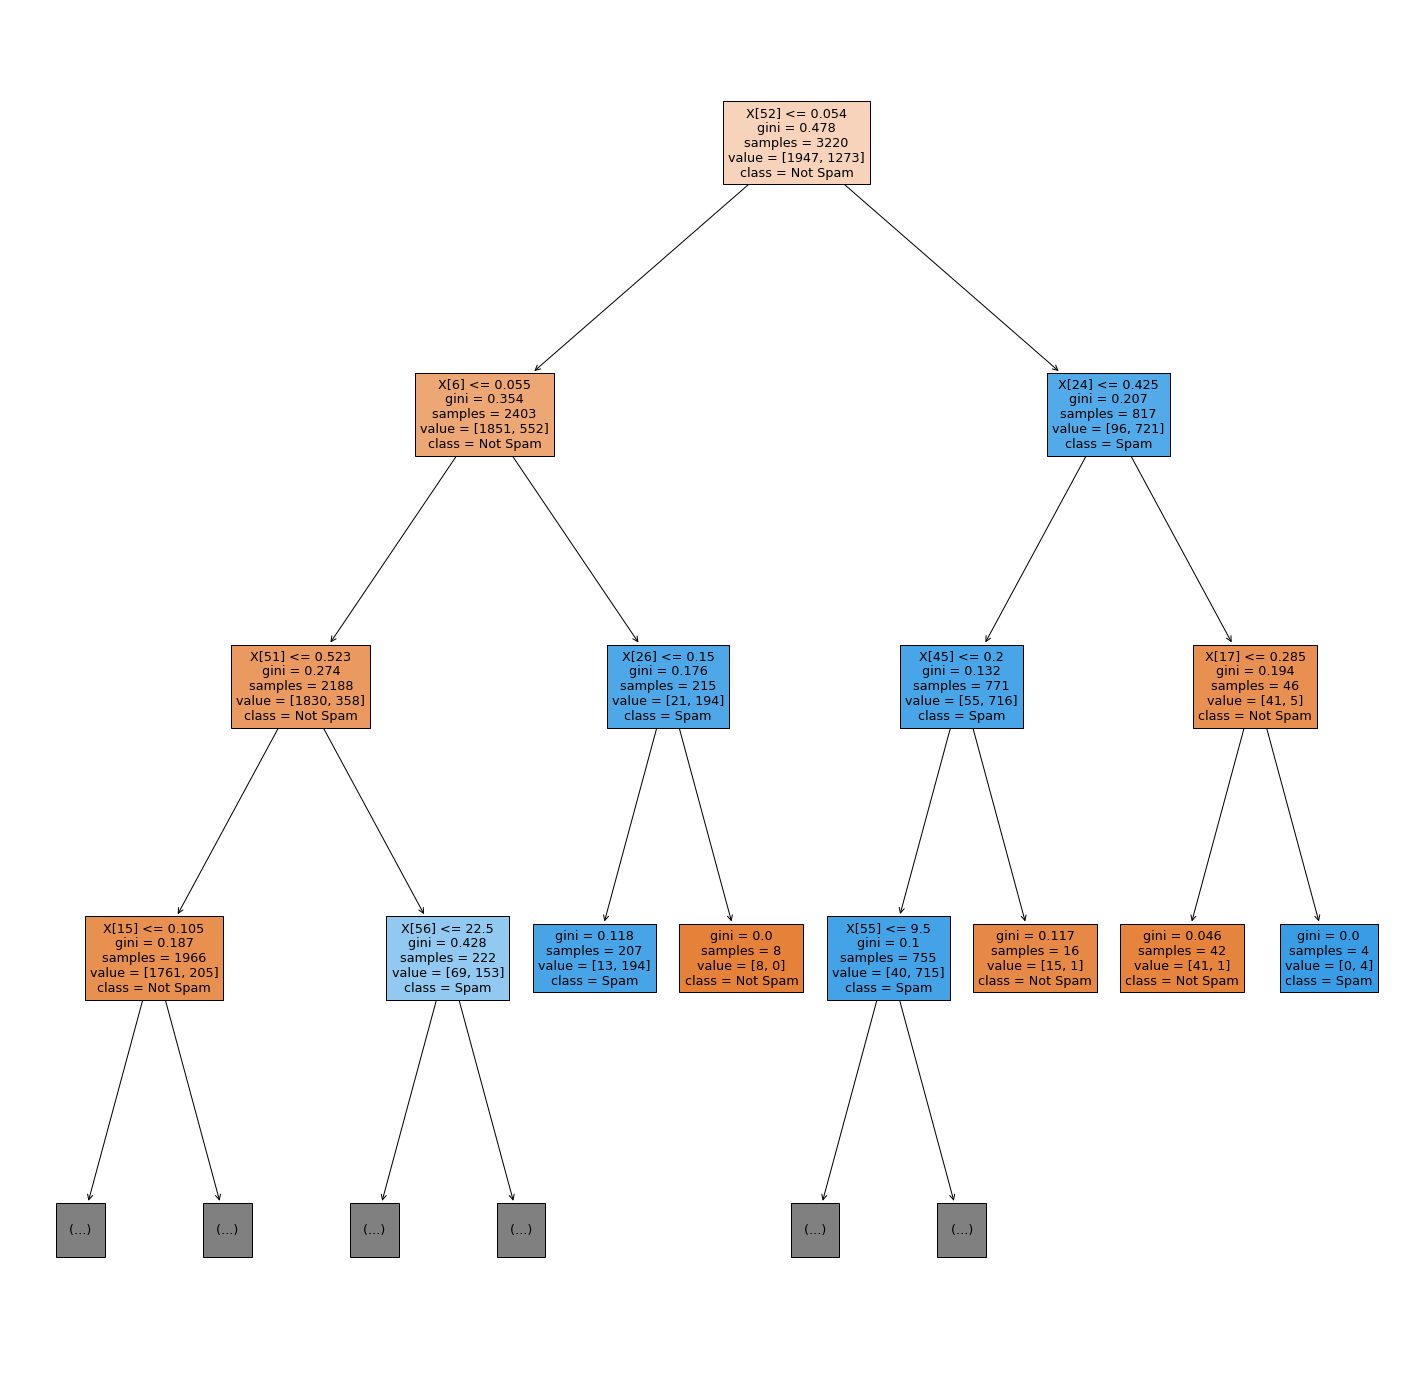

In [10]:
# Sets the figure size
fig = plt.figure(figsize=(25, 25))

# Creates a visual display of the model.
# Keep max_depth small for better visualization 
t = plot_tree(
    best_dt,
    class_names=spam,
    max_depth=3,
    filled=True)

- Confusion Matrix

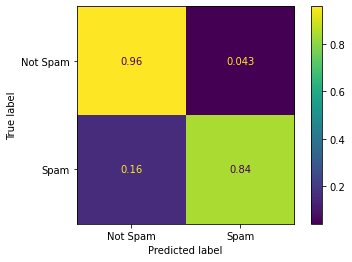

In [11]:
plot_confusion_matrix(best_dt, X_tst, y_tst, display_labels=spam, normalize='true')

- Calculate mean accuracy on testing data

In [12]:
print('Accuracy on testing data: ' + str("{:.2%}".format(best_dt.score(X_tst, y_tst))))

Accuracy on testing data: 91.24%
